In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset

In [2]:
dataset=pd.read_csv("DIABETES DATASET.csv", delimiter=",")
dataset.head()

,Pregnancies,Age,BMI,BP(Systolic),BP(Diastolic),Genetic,Insulin,Skin Thickness(mm),Glucose Consumption,Outcome
0,3,50,22.263762,140,90,0,0,317.50,14.6,1
1,1,40,24.111159,110,80,2,0,317.50,6.1,0
2,0,21,17.183204,120,80,0,0,259.08,9.7,1
3,2,30,21.244332,130,85,0,0,322.58,17.8,1
4,2,35,22.819490,110,75,0,0,335.28,16.7,1


In [3]:
dataset.tail()

,Pregnancies,Age,BMI,BP(Systolic),BP(Diastolic),Genetic,Insulin,Skin Thickness(mm),Glucose Consumption,Outcome
460,2,35,24.193597,130,90,2,0,292.1,8.1,1
461,2,40,22.077443,140,90,0,0,279.4,6.9,0
462,3,28,26.489311,140,100,0,0,317.5,12.0,1
463,2,35,22.580690,110,80,0,0,292.1,20.0,1
464,3,38,22.388934,120,70,2,0,254.0,13.0,1


In [4]:
dataset.columns

Index(['Pregnancies', 'Age', 'BMI', 'BP(Systolic)', 'BP(Diastolic)', 'Genetic',
       'Insulin', 'Skin Thickness(mm)', 'Glucose Consumption', 'Outcome'],
      dtype='object')

In [5]:
dataset.shape

(465, 10)

In [6]:
dataset.describe()

,Pregnancies,Age,BMI,BP(Systolic),BP(Diastolic),Genetic,Insulin,Skin Thickness(mm),Glucose Consumption,Outcome
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,3.047312,44.296774,25.178749,119.141935,79.425806,1.526882,5.156989,306.878430,13.739806,0.800000
std,1.845871,12.833738,3.765211,13.959504,10.695198,1.664742,8.992998,34.630121,6.519517,0.400431
min,0.000000,21.000000,17.183204,80.000000,30.000000,0.000000,0.000000,29.210000,5.000000,0.000000
25%,2.000000,35.000000,22.580690,110.000000,70.000000,0.000000,0.000000,284.480000,8.000000,1.000000
50%,3.000000,42.000000,24.576776,120.000000,80.000000,1.000000,0.000000,304.800000,12.800000,1.000000
75%,4.000000,53.000000,27.492665,130.000000,80.000000,2.000000,10.000000,330.200000,17.500000,1.000000
max,12.000000,86.000000,37.442807,180.000000,120.000000,8.000000,44.000000,406.400000,45.000000,1.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pregnancies          465 non-null    int64  
 1   Age                  465 non-null    int64  
 2   BMI                  465 non-null    float64
 3   BP(Systolic)         465 non-null    int64  
 4   BP(Diastolic)        465 non-null    int64  
 5   Genetic              465 non-null    int64  
 6   Insulin              465 non-null    int64  
 7   Skin Thickness(mm)   465 non-null    float64
 8   Glucose Consumption  465 non-null    float64
 9   Outcome              465 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 36.5 KB


# Check missing values

In [8]:
#Cheking missing values
dataset.isnull().sum()

Pregnancies            0
Age                    0
BMI                    0
BP(Systolic)           0
BP(Diastolic)          0
Genetic                0
Insulin                0
Skin Thickness(mm)     0
Glucose Consumption    0
Outcome                0
dtype: int64

# Outlier Detection

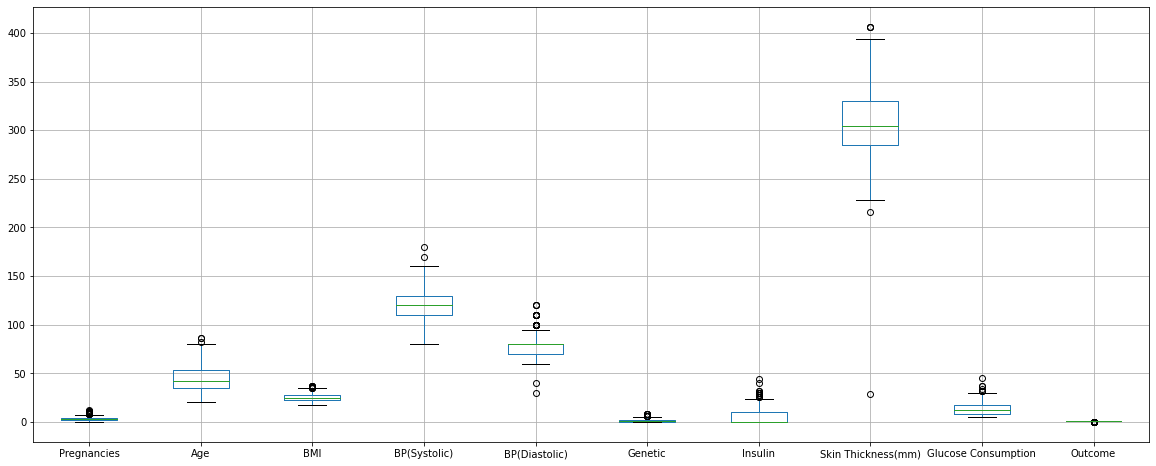

In [9]:
#detecting outlier
# Plot boxplot
plt.figure(figsize =[20,8])
dataset.boxplot()
plt.show()

In [10]:
a = dataset.iloc[: , 0:9]
b = dataset.iloc[: , 9]

In [11]:
# outlier detection replacement by median using z-score
from scipy.stats import zscore

numeric_cols=a.select_dtypes(include=[np.number]).columns
z=a[numeric_cols].apply(zscore).abs()
print(z)

     Pregnancies       Age       BMI  BP(Systolic)  BP(Diastolic)   Genetic  \
0       0.025659  0.444872  0.775023      1.495793       0.989751  0.918176   
1       1.110325  0.335164  0.283846      0.655595       0.053745  0.284505   
2       1.652658  1.817231  2.125819      0.061534       0.053745  0.918176   
3       0.567992  1.115199  1.046065      0.778664       0.521748  0.918176   
4       0.567992  0.725181  0.627269      0.655595       0.414258  0.918176   
..           ...       ...       ...           ...            ...       ...   
460     0.567992  0.725181  0.261928      0.778664       0.989751  0.284505   
461     0.567992  0.335164  0.824561      1.495793       0.989751  0.918176   
462     0.025659  1.271206  0.348446      1.495793       1.925757  0.918176   
463     0.567992  0.725181  0.690760      0.655595       0.053745  0.918176   
464     0.025659  0.491171  0.741743      0.061534       0.882261  0.284505   

      Insulin  Skin Thickness(mm)  Glucose Consumpt

In [12]:
my_cols=['Pregnancies', 'Age', 'BMI', 'BP(Systolic)', 'BP(Diastolic)',
       'Genetic', 'Insulin', 'Skin Thickness(mm)', 'Glucose Consumption']
for col in my_cols:
    z.loc[z[col]>3,col]=np.nan

In [13]:
z.isnull().sum()

Pregnancies            9
Age                    2
BMI                    4
BP(Systolic)           2
BP(Diastolic)          5
Genetic                5
Insulin                2
Skin Thickness(mm)     1
Glucose Consumption    4
dtype: int64

In [14]:
d=z.fillna(z.median())

In [15]:
new=pd.concat([d,b],axis=1)
new.head()

,Pregnancies,Age,BMI,BP(Systolic),BP(Diastolic),Genetic,Insulin,Skin Thickness(mm),Glucose Consumption,Outcome
0,0.025659,0.444872,0.775023,1.495793,0.989751,0.918176,0.574063,0.307045,0.132083,1
1,1.110325,0.335164,0.283846,0.655595,0.053745,0.284505,0.574063,0.307045,1.173098,0
2,1.652658,1.817231,2.125819,0.061534,0.053745,0.918176,0.574063,1.381742,0.620315,1
3,0.567992,1.115199,1.046065,0.778664,0.521748,0.918176,0.574063,0.453896,0.623446,1
4,0.567992,0.725181,0.627269,0.655595,0.414258,0.918176,0.574063,0.821024,0.454540,1


In [16]:
X= new.iloc[:,new.columns !="Outcome"]
y= new.iloc[:,new.columns == "Outcome"]

In [17]:
y=new["Outcome"]
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Outcome, dtype: int64

# Balancing outcome by SMOTE

In [18]:
#Lets check if the data is Balanced or not
round(dataset.Outcome.value_counts(normalize = True),2)

1    0.8
0    0.2
Name: Outcome, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

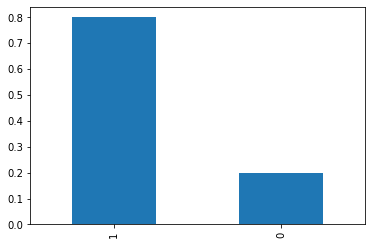

In [19]:
# Bar plot with respec to Outcoome 1 and 0 
round(dataset.Outcome.value_counts(normalize = True),2).plot.bar()
plt.show

In [20]:
from imblearn.over_sampling  import SMOTE
smt= SMOTE()
data_X,data_y =smt.fit_resample(X, y)

In [21]:
print(data_X.shape)
print(data_y.shape)

(744, 9)
(744,)


<AxesSubplot:>

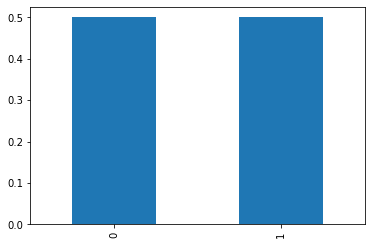

In [22]:
data_y.value_counts(normalize = True).plot.bar()

# Data scaling

In [23]:
from sklearn.preprocessing import StandardScaler
trans= StandardScaler()
trans.fit(X)
X=trans.fit_transform(X)

In [24]:
#fix random seed for reproducibility
import numpy
seed = 7
numpy.random.seed(seed)

# Split dataset

In [25]:
#split into 70% for train and 30% for test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X,data_y, test_size=0.30, random_state=seed)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((520, 9), (224, 9), (520,), (224,))

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
import tensorflow as tf

# Define model

In [27]:
model1= Sequential ()
model1.add(Dense(12, input_dim=9, activation= 'relu' ))
model1.add(Dense(1, activation= 'sigmoid' ))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


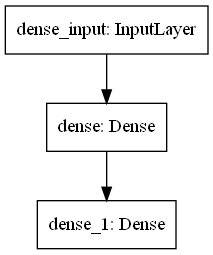

In [28]:
from keras.utils import plot_model
plot_model(model1, to_file='multilayer_perceptron_graph.png')

In [29]:
from keras.callbacks import EarlyStopping
es= EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

# Compile model

In [30]:
model1.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

# Fit the model

In [31]:
history1=model1.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=200)

Epoch 1/200
17/17 [==============================] - 0s 24ms/step - loss: 0.6970 - accuracy: 0.5173 - val_loss: 0.7085 - val_accuracy: 0.4777
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 0.6906 - accuracy: 0.5288 - val_loss: 0.7025 - val_accuracy: 0.5223
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 0.6854 - accuracy: 0.5423 - val_loss: 0.6988 - val_accuracy: 0.5223
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5577 - val_loss: 0.6934 - val_accuracy: 0.5402
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.6758 - accuracy: 0.5577 - val_loss: 0.6862 - val_accuracy: 0.5446
Epoch 6/200
17/17 [==============================] - 0s 5ms/step - loss: 0.6707 - accuracy: 0.5731 - val_loss: 0.6813 - val_accuracy: 0.5402
Epoch 7/200
17/17 [==============================] - 0s 4ms/step - loss: 0.6662 - accuracy: 0.6000 - val_loss: 0.6758 - val_accuracy: 0.5580
Epoch 8/200


Epoch 59/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8712 - val_loss: 0.4134 - val_accuracy: 0.8393
Epoch 60/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3905 - accuracy: 0.8692 - val_loss: 0.4113 - val_accuracy: 0.8438
Epoch 61/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3889 - accuracy: 0.8635 - val_loss: 0.4090 - val_accuracy: 0.8527
Epoch 62/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3865 - accuracy: 0.8731 - val_loss: 0.4094 - val_accuracy: 0.8393
Epoch 63/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3854 - accuracy: 0.8750 - val_loss: 0.4072 - val_accuracy: 0.8438
Epoch 64/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.8750 - val_loss: 0.4062 - val_accuracy: 0.8482
Epoch 65/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3824 - accuracy: 0.8750 - val_loss: 0.4045 - val_accuracy: 0.8527
Epoch 

17/17 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.8827 - val_loss: 0.3624 - val_accuracy: 0.8661
Epoch 117/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.8788 - val_loss: 0.3613 - val_accuracy: 0.8527
Epoch 118/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8827 - val_loss: 0.3608 - val_accuracy: 0.8527
Epoch 119/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3316 - accuracy: 0.8808 - val_loss: 0.3602 - val_accuracy: 0.8527
Epoch 120/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3308 - accuracy: 0.8827 - val_loss: 0.3598 - val_accuracy: 0.8482
Epoch 121/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3302 - accuracy: 0.8827 - val_loss: 0.3596 - val_accuracy: 0.8482
Epoch 122/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3293 - accuracy: 0.8865 - val_loss: 0.3588 - val_accuracy: 0.8616
Epoch 123/200

17/17 [==============================] - 0s 2ms/step - loss: 0.2910 - accuracy: 0.8981 - val_loss: 0.3250 - val_accuracy: 0.8795
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2904 - accuracy: 0.8981 - val_loss: 0.3245 - val_accuracy: 0.8750
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2904 - accuracy: 0.8981 - val_loss: 0.3236 - val_accuracy: 0.8795
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2893 - accuracy: 0.8981 - val_loss: 0.3240 - val_accuracy: 0.8750
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2883 - accuracy: 0.9019 - val_loss: 0.3229 - val_accuracy: 0.8839
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2881 - accuracy: 0.8981 - val_loss: 0.3223 - val_accuracy: 0.8750
Epoch 179/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2871 - accuracy: 0.8981 - val_loss: 0.3219 - val_accuracy: 0.8795
Epoch 180/200

# Evaluate the model

In [32]:
# evaluate the model
_,train_acc = model1.evaluate(X_train, y_train)
_,test_acc = model1.evaluate(X_test, y_test)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

7/7 [==============================] - 0s 1ms/step - loss: 0.3098 - accuracy: 0.8839
Train: 0.898, Test: 0.884


# Summarize history for loss

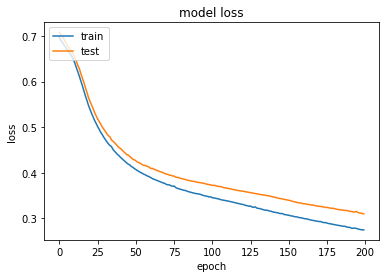

In [33]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize history for accuracy

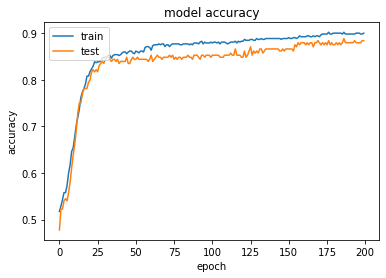

In [34]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Prediction

In [35]:
predict_y=model1.predict(X_test)
predict_value=[]
for predict in predict_y:
    if predict>0.5:
     predict_value.append(1)
    else:
        predict_value.append(0)

# Confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict_value))

[[120   2]
 [ 24  78]]


# Classification report

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict_value))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       122
           1       0.97      0.76      0.86       102

    accuracy                           0.88       224
   macro avg       0.90      0.87      0.88       224
weighted avg       0.90      0.88      0.88       224



In [38]:
model1.save('model1.h5')

# Train two more different neural network architectues

In [39]:
model2= Sequential ()
model2.add(Dense(12, input_dim=9, activation= 'relu' ))
model2.add(Dropout(.25))
model2.add(Dense(8, activation= 'relu' ))
model2.add(Dense(1, activation= 'sigmoid' ))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12)                120       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


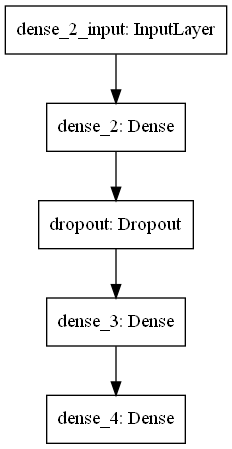

In [40]:
from keras.utils import plot_model
plot_model(model2, to_file='multilayer_perceptron_graph.png')

# Compile the model

In [41]:
model2.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

In [42]:
from keras.callbacks import EarlyStopping
es= EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

In [43]:
history2=model2.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=200)

Epoch 1/200
17/17 [==============================] - 0s 12ms/step - loss: 0.8032 - accuracy: 0.4827 - val_loss: 0.6964 - val_accuracy: 0.5402
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.7650 - accuracy: 0.4442 - val_loss: 0.6856 - val_accuracy: 0.5759
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.7228 - accuracy: 0.4942 - val_loss: 0.6845 - val_accuracy: 0.5804
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.7089 - accuracy: 0.5019 - val_loss: 0.6854 - val_accuracy: 0.5491
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5404 - val_loss: 0.6859 - val_accuracy: 0.5625
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.5538 - val_loss: 0.6865 - val_accuracy: 0.5536
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.5750 - val_loss: 0.6871 - val_accuracy: 0.5402
Epoch 8/200


Epoch 59/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8154 - val_loss: 0.3880 - val_accuracy: 0.8571
Epoch 60/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.8231 - val_loss: 0.3858 - val_accuracy: 0.8571
Epoch 61/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3943 - accuracy: 0.8231 - val_loss: 0.3825 - val_accuracy: 0.8482
Epoch 62/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8404 - val_loss: 0.3816 - val_accuracy: 0.8527
Epoch 63/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4045 - accuracy: 0.8327 - val_loss: 0.3849 - val_accuracy: 0.8527
Epoch 64/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.8404 - val_loss: 0.3806 - val_accuracy: 0.8527
Epoch 65/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.8442 - val_loss: 0.3821 - val_accuracy: 0.8482
Epoch 

17/17 [==============================] - 0s 3ms/step - loss: 0.3078 - accuracy: 0.8904 - val_loss: 0.3236 - val_accuracy: 0.8839
Epoch 117/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3134 - accuracy: 0.8808 - val_loss: 0.3250 - val_accuracy: 0.8705
Epoch 118/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3031 - accuracy: 0.8808 - val_loss: 0.3251 - val_accuracy: 0.8661
Epoch 119/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2960 - accuracy: 0.8885 - val_loss: 0.3246 - val_accuracy: 0.8661
Epoch 120/200
17/17 [==============================] - ETA: 0s - loss: 0.3240 - accuracy: 0.87 - 0s 3ms/step - loss: 0.2878 - accuracy: 0.8865 - val_loss: 0.3191 - val_accuracy: 0.8750
Epoch 121/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3059 - accuracy: 0.8769 - val_loss: 0.3150 - val_accuracy: 0.8616
Epoch 122/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3159 - accuracy: 0.8788 - val_loss: 0

17/17 [==============================] - 0s 2ms/step - loss: 0.2525 - accuracy: 0.9096 - val_loss: 0.2849 - val_accuracy: 0.8929
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2695 - accuracy: 0.8846 - val_loss: 0.2843 - val_accuracy: 0.8929
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2633 - accuracy: 0.8962 - val_loss: 0.2838 - val_accuracy: 0.8973
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2675 - accuracy: 0.8942 - val_loss: 0.2801 - val_accuracy: 0.8929
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2867 - accuracy: 0.8923 - val_loss: 0.2813 - val_accuracy: 0.9018
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2688 - accuracy: 0.8981 - val_loss: 0.2822 - val_accuracy: 0.9018
Epoch 179/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2562 - accuracy: 0.8981 - val_loss: 0.2798 - val_accuracy: 0.9018
Epoch 180/200

In [44]:
_,train_acc = model2.evaluate(X_train, y_train)
_,test_acc = model2.evaluate(X_test, y_test)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

7/7 [==============================] - 0s 1ms/step - loss: 0.2654 - accuracy: 0.9062
Train: 0.921, Test: 0.906


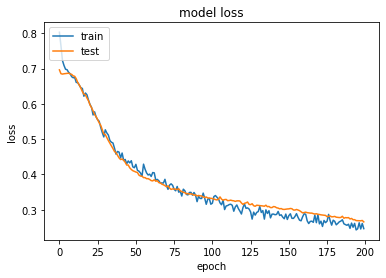

In [45]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

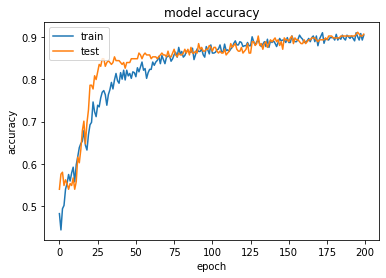

In [46]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [47]:
predict_y=model2.predict(X_test)
predict_value=[]
for predict in predict_y:
    if predict>0.5:
     predict_value.append(1)
    else:
        predict_value.append(0)
print(predict_value)        

[0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1]


In [48]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict_value))

[[119   3]
 [ 18  84]]


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict_value))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       122
           1       0.97      0.82      0.89       102

    accuracy                           0.91       224
   macro avg       0.92      0.90      0.90       224
weighted avg       0.91      0.91      0.91       224



In [50]:
model2.save('model2.h5')

In [51]:
model3= Sequential ()
model3.add(Dense(10, input_dim=9, activation= 'relu' ))
model3.add(Dense(6, activation= 'relu' ))
model3.add(Dense(8, activation= 'relu' ))
model3.add(Dropout(0.25))
model3.add(Dense(1, activation= 'sigmoid' ))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                100       
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 56        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


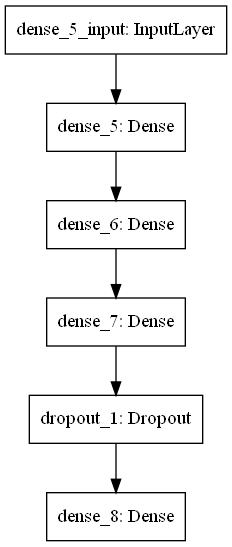

In [52]:
from keras.utils import plot_model
plot_model(model3, to_file='multilayer_perceptron_graph.png')

In [53]:
model3.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

In [54]:
es= EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

In [55]:
history3=model3.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=200)

Epoch 1/200
17/17 [==============================] - 0s 23ms/step - loss: 0.7063 - accuracy: 0.4712 - val_loss: 0.6938 - val_accuracy: 0.4955
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5519 - val_loss: 0.6927 - val_accuracy: 0.5223
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5308 - val_loss: 0.6915 - val_accuracy: 0.5625
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.5192 - val_loss: 0.6910 - val_accuracy: 0.5938
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5596 - val_loss: 0.6906 - val_accuracy: 0.5893
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5327 - val_loss: 0.6897 - val_accuracy: 0.5536
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.5808 - val_loss: 0.6879 - val_accuracy: 0.5179
Epoch 8/200


17/17 [==============================] - 0s 3ms/step - loss: 0.3261 - accuracy: 0.8885 - val_loss: 0.3113 - val_accuracy: 0.8973
Epoch 59/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3161 - accuracy: 0.8846 - val_loss: 0.3094 - val_accuracy: 0.8929
Epoch 60/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3177 - accuracy: 0.8904 - val_loss: 0.3075 - val_accuracy: 0.8973
Epoch 61/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3284 - accuracy: 0.8846 - val_loss: 0.3056 - val_accuracy: 0.8929
Epoch 62/200
17/17 [==============================] - 0s 4ms/step - loss: 0.3266 - accuracy: 0.8808 - val_loss: 0.3062 - val_accuracy: 0.9018
Epoch 63/200
17/17 [==============================] - 0s 4ms/step - loss: 0.3144 - accuracy: 0.8904 - val_loss: 0.3055 - val_accuracy: 0.8929
Epoch 64/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3074 - accuracy: 0.8808 - val_loss: 0.2998 - val_accuracy: 0.8973
Epoch 65/200
17/17 

Epoch 116/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2554 - accuracy: 0.8942 - val_loss: 0.2508 - val_accuracy: 0.9018
Epoch 117/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2705 - accuracy: 0.8923 - val_loss: 0.2549 - val_accuracy: 0.9107
Epoch 118/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2675 - accuracy: 0.8942 - val_loss: 0.2553 - val_accuracy: 0.9107
Epoch 119/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2660 - accuracy: 0.8942 - val_loss: 0.2529 - val_accuracy: 0.9107
Epoch 120/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2664 - accuracy: 0.8942 - val_loss: 0.2537 - val_accuracy: 0.9107
Epoch 121/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2639 - accuracy: 0.8942 - val_loss: 0.2490 - val_accuracy: 0.9107
Epoch 122/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2690 - accuracy: 0.8923 - val_loss: 0.2499 - val_accuracy: 0.9107

Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2118 - accuracy: 0.9250 - val_loss: 0.2027 - val_accuracy: 0.9107
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2082 - accuracy: 0.9308 - val_loss: 0.2063 - val_accuracy: 0.9107
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2038 - accuracy: 0.9212 - val_loss: 0.2041 - val_accuracy: 0.9107
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2129 - accuracy: 0.9212 - val_loss: 0.2075 - val_accuracy: 0.9062
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2054 - accuracy: 0.9308 - val_loss: 0.2062 - val_accuracy: 0.9196
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1943 - accuracy: 0.9327 - val_loss: 0.2051 - val_accuracy: 0.9107
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9288 - val_loss: 0.2006 - val_accuracy: 0.9196

In [56]:
_,train_acc = model3.evaluate(X_train, y_train)
_,test_acc = model3.evaluate(X_test, y_test)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

7/7 [==============================] - 0s 997us/step - loss: 0.1814 - accuracy: 0.9241
Train: 0.950, Test: 0.924


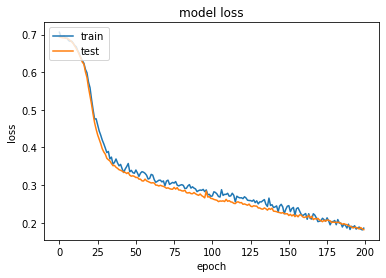

In [57]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

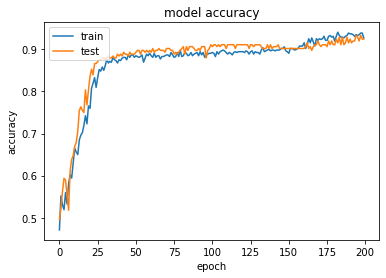

In [58]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [59]:
predict_y=model3.predict(X_test)
predict_value=[]
for predict in predict_y:
    if predict>0.5:
     predict_value.append(1)
    else:
        predict_value.append(0)
print(predict_value)        

[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0]


In [60]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict_value))

[[120   2]
 [ 15  87]]


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict_value))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       122
           1       0.98      0.85      0.91       102

    accuracy                           0.92       224
   macro avg       0.93      0.92      0.92       224
weighted avg       0.93      0.92      0.92       224



In [62]:
model3.save('model3.h5')

# Create a Python list of loaded models

In [63]:
def load_all_models(n_models):
    all_models = list()
    for i in range(n_models):
        # define filename for this ensemble
        filename = 'model' + str(i + 1) + '.h5'
# load model from file
        model = load_model(filename)
# add to list of members
        all_models.append(model)
        print('>loaded %s' % filename)
    return all_models

# Call this function to load three saved models

In [64]:
# load all models
from keras.models import load_model
n_members = 3
members = load_all_models(n_members)
print('Loaded %d model' % len(members))

>loaded model1.h5
>loaded model2.h5
>loaded model3.h5
Loaded 3 model


# Prepare a training dataset for the meta-learner

In [65]:
# create stacked model input dataset as outputs from the ensemble
from numpy import dstack
def stacked_dataset(members, inputX):
    stackX = None
    for model in members:
# make prediction
        yhat = model.predict(inputX, verbose=0)
# stack predictions into [rows, members, probabilities]
        if stackX is None:
            stackX = yhat
        else:
            stackX = dstack((stackX, yhat))
# flatten predictions to [rows, members x probabilities]
    stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
    return stackX

# Use the prepared training dataset to fit a meta-learner model

In [66]:
# fit a model based on the outputs from the ensemble members
from sklearn.linear_model import LogisticRegression
def fit_stacked_model(members, inputX, inputy):
# create dataset using ensemble
    stackedX = stacked_dataset(members, inputX)
# fit standalone model
    model = LogisticRegression()
    model.fit(stackedX, inputy)
    return model

# Make a prediction with the stacked model

In [67]:
def stacked_prediction(members, model, inputX):
# create dataset using ensemble
    stackedX = stacked_dataset(members, inputX)
#make a prediction
    yhat = model.predict(stackedX)
    return yhat

# Evaluate each single model on the training dataset and establish a baseline of performance

In [68]:
# evaluate standalone models on test dataset
for model in members:
    y_test_enc = y_test
    _, acc = model.evaluate(X_test, y_test_enc, verbose=0)
    print('Model Accuracy: %.3f' % acc)

Model Accuracy: 0.884
Model Accuracy: 0.906
Model Accuracy: 0.924


# Fit stacked model using the ensemble

In [69]:
from sklearn.metrics import accuracy_score
model = fit_stacked_model(members, X_test, y_test_enc)

# Evaluate model on test set

In [70]:
yhat = stacked_prediction(members, model, X_test)
acc = accuracy_score(y_test_enc, yhat)
print('Stacked Test Accuracy: %.3f' % acc)

Stacked Test Accuracy: 0.929


In [71]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_enc, yhat))

[[119   3]
 [ 13  89]]


In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test_enc, yhat))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       122
           1       0.97      0.87      0.92       102

    accuracy                           0.93       224
   macro avg       0.93      0.92      0.93       224
weighted avg       0.93      0.93      0.93       224

